In [3]:
import os 
import sys 
import pathlib 
path = pathlib.Path(os.getcwd())
module_path = str(path.parent) + '/'
sys.path.append(module_path)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymdp import utils


In [5]:
"""Automated context switching"""

map_context_1 = [
    'SFF',
    'FFH',
    'FGF']

map_context_2 = [
    'SFF',
    'FFG',
    'FHF']

map_context_1 = np.array([["S", "F", "F"], ["F", "F", "H"], ["F", "G", "F"]])
map_context_2 = np.array([["S", "F", "F"], ["F", "F", "G"], ["F", "H", "F"]])

grid_width = 3
grid_height = 3

def plot_grid(grid_width, grid_height, position = 0):

    grid = np.zeros((grid_width, grid_height))

    # grid[1,2] = 1
    # grid[2,1] = -1

    if position == 0:
        grid[0,0] += 2
    elif position == 1:
        grid[0,1] += 2
    elif position == 2:
        grid[0,2] += 2
    elif position == 3:
        grid[1,0] += 2
    elif position == 4:
        grid[1,1] += 2
    elif position == 5:
        grid[1,2] += 2
    elif position == 6:
        grid[2,0] += 2
    elif position == 7:
        grid[2,1] += 2
    elif position == 8:
        grid[2,2] += 2
    
    

    # Plotting the array with each grid labeled with integers, indexed at 0 (without the colorbar)
    fig, ax = plt.subplots(figsize = (2,2))
    cax = ax.matshow(grid, cmap='viridis')

    # Labeling each cell with the corresponding integer, adjusted for zero-indexing
    for (i, j), val in np.ndenumerate(map_context_1):
        ax.text(j, i, str(val ), ha='center', va='center', color='white')
    plt.show()

plot_grid(grid_width, grid_height)

ModuleNotFoundError: No module named 'gym'

In [ ]:
""" Create variables for the storing the dimensionalities of the hidden states and the observations """
import itertools

#HIDDEN STATES
""" Create  the grid locations in the form of a list of (Y, X) tuples -- HINT: use itertools """
grid_location_states = list(itertools.product(range(grid_width), range(grid_height))) #hidden state
context_names = ['Goal-8', 'Goal-6'] #context 0 and context 1

print(f"grid_location_states: {grid_location_states}")
print(f" Length of grid_location_states: {len(grid_location_states)}")

""" Define `num_states` and `num_factors` below """
num_states = [len(grid_location_states), len(context_names)] #[9,2]
num_state_factors = len(num_states) #2 hidden state factors

location_action_names = ["UP", "RIGHT", "DOWN", "LEFT"] #, "STAY"]

context_action_names = ["Do-nothing"]
""" Define `num_controls` below """
num_controls = [len(location_action_names), len(context_action_names)] #num of actions

#OBSERVATIONS
grid_location_obs = list(itertools.product(range(grid_width), range(grid_height)))
score_obs = ["positive", "negative", "neutral"]

""" Define `num_obs` and `num_modalities` below """
num_obs = [len(grid_location_obs), len(score_obs)] # [9, 3]
num_modalities = len(num_obs) #2 observation modalities

grid_location_states: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
 Length of grid_location_states: 9


In [ ]:
""" Generate the A array """
A = utils.obj_array( num_modalities )

A_location = np.zeros((len(grid_location_obs), len(grid_location_states), len(context_names))) #[observation modality, SF1, SF2]

for i in range(len(context_names)):
    A_location[:,:,i] = np.eye(len(grid_location_obs))

A[0] = A_location


A_score = np.zeros((len(score_obs), len(grid_location_states), len(context_names))) #[observation modality, SF1, SF2]

#for first context (Pos, Neg, Neutral)
A_score[:,:,0] = np.array([[0,0,1]] * 9).T #
A_score[:,7,0] = [1,0,0]
A_score[:,5,0] = [0,1,0]

#for second context
A_score[:,:,1] = np.array([[0,0,1]] * 9).T
A_score[:,5,1] = [1,0,0]
A_score[:,7,1] = [0,1,0]

A[1] = A_score

In [ ]:
#Do we need to hardcode absorbing latent states in G and H?

#location_action_names = [ "UP", "DOWN", "LEFT", "RIGHT"] #actions we can take

#Initialize overall B

B = utils.obj_array(len(num_states))

#B[0]: State Factor 1: Location
#9x9x4: [len(location), len(location), len(actions)]
#depends on movement

B_grid_movement = np.zeros((len(grid_location_states), len(grid_location_states), len(location_action_names))) #[observation modality, SF1, SF2]
#For UP action
B_grid_movement[:,0,0] = [1,0,0,0,0,0,0,0,0]
B_grid_movement[:,1,0] = [0,1,0,0,0,0,0,0,0]
B_grid_movement[:,2,0] = [0,0,1,0,0,0,0,0,0]
B_grid_movement[:,3,0] = [1,0,0,0,0,0,0,0,0]
B_grid_movement[:,4,0] = [0,1,0,0,0,0,0,0,0]
B_grid_movement[:,5,0] = [0,0,1,0,0,0,0,0,0]
B_grid_movement[:,6,0] = [0,0,0,1,0,0,0,0,0]
B_grid_movement[:,7,0] = [0,0,0,0,1,0,0,0,0]
B_grid_movement[:,8,0] = [0,0,0,0,0,1,0,0,0]

#For DOWN action

B_grid_movement[:,0,2] = [0,0,0,1,0,0,0,0,0]
B_grid_movement[:,1,2] = [0,0,0,0,1,0,0,0,0]
B_grid_movement[:,2,2] = [0,0,0,0,0,1,0,0,0]
B_grid_movement[:,3,2] = [0,0,0,0,0,0,1,0,0]
B_grid_movement[:,4,2] = [0,0,0,0,0,0,0,1,0]
B_grid_movement[:,5,2] = [0,0,0,0,0,0,0,0,1]
B_grid_movement[:,6,2] = [0,0,0,0,0,0,1,0,0]
B_grid_movement[:,7,2] = [0,0,0,0,0,0,0,1,0]
B_grid_movement[:,8,2] = [0,0,0,0,0,0,0,0,1]

#For LEFT action

B_grid_movement[:,0,3] = [1,0,0,0,0,0,0,0,0]
B_grid_movement[:,1,3] = [1,0,0,0,0,0,0,0,0]
B_grid_movement[:,2,3] = [0,1,0,0,0,0,0,0,0]
B_grid_movement[:,3,3] = [0,0,0,1,0,0,0,0,0]
B_grid_movement[:,4,3] = [0,0,0,1,0,0,0,0,0]
B_grid_movement[:,5,3] = [0,0,0,0,1,0,0,0,0]
B_grid_movement[:,6,3] = [0,0,0,0,0,0,1,0,0]
B_grid_movement[:,7,3] = [0,0,0,0,0,0,1,0,0]
B_grid_movement[:,8,3] = [0,0,0,0,0,0,0,1,0]

#For RIGHT action

B_grid_movement[:,0,1] = [0,1,0,0,0,0,0,0,0]
B_grid_movement[:,1,1] = [0,0,1,0,0,0,0,0,0]
B_grid_movement[:,2,1] = [0,0,1,0,0,0,0,0,0]
B_grid_movement[:,3,1] = [0,0,0,0,1,0,0,0,0]
B_grid_movement[:,4,1] = [0,0,0,0,0,1,0,0,0]
B_grid_movement[:,5,1] = [0,0,0,0,0,1,0,0,0]
B_grid_movement[:,6,1] = [0,0,0,0,0,0,0,1,0]
B_grid_movement[:,7,1] = [0,0,0,0,0,0,0,0,1]
B_grid_movement[:,8,1] = [0,0,0,0,0,0,0,0,1]

B[0] = B_grid_movement

B_context = np.zeros((len(context_names), len(context_names), len(context_action_names)))

B_context[:,:,0] = np.eye(len(context_names))

B[1] = B_context


In [ ]:
#Overall C
C = utils.obj_array( num_modalities )

#Preference over Observation Modality 1: Grid Locations [-4, 0, ... 0]
C[0] = np.array([-4, 0, 0, 0, 0, 0, 0, 0, 0]) #we prefer to not stay in the starting location

#Preference over Observation Modality 2: Scores [-4, 4, 0]
C[1] = np.array([4, -4, 0]) #we prefer the goal state, we negatively prefer the hole state, and are neutral else

In [ ]:
#Overall D
D = utils.obj_array( num_state_factors )

#Prior over State Factor 1: Grid Locations: [1,0,0,0,0,0,0,0,0]
D[0] = np.array([1,0,0,0,0,0,0,0,0])

#Prior over State Factor 2: Context: Uniform [.5 .5]
D[1] = np.array([.5, .5])

In [ ]:
num_modalities

2

In [ ]:
num_states

[9, 2]

In [ ]:
from pymdp.agent import Agent
policy_len = 3

zeta_single = 2.0 

zeta_modalities = [1,2]

zeta_modalities_and_states = utils.obj_array(num_modalities)
zeta_modalities_and_states[0] = np.random.uniform(0,1,size = (num_states[0], num_states[1]))
zeta_modalities_and_states[1] = np.random.uniform(0,1,size = (num_states[0], num_states[1]))

agent_zeta_single = Agent(A = A, B = B, C = C, D = D, policy_len = policy_len, beta_zeta_prior= zeta_single) #policy length = number of actions in policies
agent_zeta_m = Agent(A = A, B = B, C = C, D = D, policy_len = policy_len, beta_zeta_prior = zeta_modalities) #policy length = number of actions in policies
agent_zeta_ms = Agent(A = A, B = B, C = C, D = D, policy_len = policy_len, beta_zeta_prior = zeta_modalities_and_states) #policy length = number of actions in policies

#tell the agent we are only

In [ ]:
B[0].shape[1:]


(9, 4)

In [ ]:

omega_single = 2.0

omega_factors = [1,2]

omega_modalities_and_states = utils.obj_array(2)
omega_modalities_and_states[0] = np.random.uniform(0,1,size = B[0].shape[1:]
)
omega_modalities_and_states[1] = np.random.uniform(0,1,size = B[1].shape[1:]
)


agent_omega_single = Agent(A = A, B = B, C = C, D = D, policy_len = policy_len, beta_omega_prior= omega_single) #policy length = number of actions in policies
agent_omega_f = Agent(A = A, B = B, C = C, D = D, policy_len = policy_len, beta_omega_prior = omega_factors) #policy length = number of actions in policies
agent_omega_fs = Agent(A = A, B = B, C = C, D = D, policy_len = policy_len, beta_omega_prior = omega_modalities_and_states) #policy length = number of actions in policies



In [ ]:
agent_zeta_omega = Agent(A = A, B = B, C = C, D = D, policy_len = policy_len, beta_omega_prior = omega_modalities_and_states, beta_zeta_prior = zeta_modalities_and_states) #policy length = number of actions in policies




In [ ]:
#Auxiliary function that takes in agent and outputs score ... Environment step function will have two step
def score_from_location(location):
  if location == 7:
    score = 0

  elif location == 5:
    score = 1

  else:
    score = 2

  return score

TIMESTEP: 0
next_action: DOWN
location_observation: 3
score_observation: 2


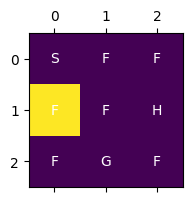

TIMESTEP: 1
next_action: RIGHT
location_observation: 4
score_observation: 2


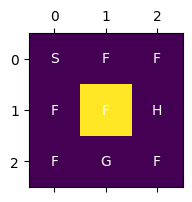

Omega: [array([[1.04641062, 1.12407966, 1.90722197, 2.87954153],
        [1.98093409, 2.01459375, 0.16364767, 2.7383709 ],
        [0.01734636, 0.47216454, 2.36763312, 2.7135207 ],
        [0.25694374, 2.17180762, 1.48722221, 0.81612469],
        [1.64744803, 0.69815399, 2.81695806, 0.6666198 ],
        [2.13072639, 1.59612866, 2.31785591, 0.88172215],
        [2.38551197, 2.52172989, 1.1225697 , 1.79496443],
        [0.71075962, 2.36616351, 0.79545236, 0.22311776],
        [2.61872878, 2.38711889, 0.25501781, 1.07010261]])
 array([[0.08223541],
        [2.20702877]])]
Zeta: [array([[3.41359786e-01, 1.11224782e-01],
        [2.99868762e-01, 8.96793769e-01],
        [9.23566776e-01, 1.00666739e-02],
        [7.94824809e-01, 6.93664347e-01],
        [9.88848939e-01, 2.54569923e-01],
        [9.69105182e-01, 4.96595443e-04],
        [7.13237161e-01, 6.71904404e-01],
        [7.91527989e-01, 8.75200950e-01],
        [9.15040968e-01, 5.98498362e-01]])
 array([[0.93850486, 0.99224325],
     

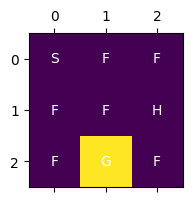

Omega: [array([[1.07885947, 1.15652851, 1.93967082, 2.91199038],
        [2.01338295, 2.04704261, 0.19609653, 2.77081976],
        [0.04979523, 0.50461341, 2.40008199, 2.74596957],
        [0.2893926 , 2.20425648, 1.51967107, 0.84857355],
        [1.6798969 , 0.73060286, 2.84940693, 0.69906867],
        [2.16317527, 1.62857754, 2.35030479, 0.91417103],
        [2.385512  , 2.52172991, 1.12256972, 1.79496446],
        [0.74320855, 2.39861244, 0.82790129, 0.25556669],
        [2.65117772, 2.41956783, 0.28746675, 1.10255155]])
 array([[0.05274298],
        [2.44147536]])]
Zeta: [array([[3.41359277e-01, 1.11224272e-01],
        [2.99868252e-01, 8.96793330e-01],
        [9.23566397e-01, 1.00661645e-02],
        [7.94824300e-01, 6.93663837e-01],
        [9.88848669e-01, 2.54569414e-01],
        [9.69104884e-01, 4.96086046e-04],
        [7.13236651e-01, 6.71903894e-01],
        [7.91527479e-01, 8.75200458e-01],
        [9.15040571e-01, 5.98497853e-01]])
 array([[0.93872142, 0.99242653],
     

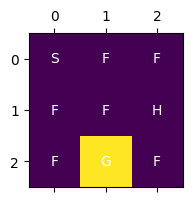

Omega: [array([[1.03928994, 1.11695898, 1.9001013 , 2.87242085],
        [1.97381343, 2.00747309, 0.15652701, 2.73125023],
        [0.0102257 , 0.46504389, 2.36051246, 2.70640004],
        [0.241587  , 2.15645088, 1.47186548, 0.80076795],
        [1.62671101, 0.67741697, 2.79622104, 0.64588277],
        [2.12103986, 1.58644213, 2.30816938, 0.87203562],
        [2.26961394, 2.40583186, 1.00667167, 1.6790664 ],
        [0.55353415, 2.20893804, 0.63822689, 0.06589229],
        [2.52407581, 2.29246592, 0.16036485, 0.97544964]])
 array([[ 0.68826525],
        [38.77789531]])]
Zeta: [array([[3.41359786e-01, 1.11224782e-01],
        [2.99868762e-01, 8.96793769e-01],
        [9.23566776e-01, 1.00666739e-02],
        [7.94824809e-01, 6.93664347e-01],
        [9.88848939e-01, 2.54569923e-01],
        [9.69105182e-01, 4.96595443e-04],
        [7.13237161e-01, 6.71904404e-01],
        [7.91527989e-01, 8.75200950e-01],
        [9.15040968e-01, 5.98498362e-01]])
 array([[0.93872142, 0.99242653],
   

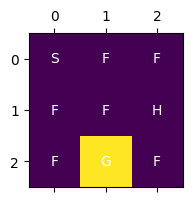

Omega: [array([[1.04641062, 1.12407966, 1.90722197, 2.87954153],
        [1.98093411, 2.01459376, 0.16364769, 2.73837091],
        [0.01734638, 0.47216457, 2.36763314, 2.71352072],
        [0.25694375, 2.17180763, 1.48722223, 0.8161247 ],
        [1.64744806, 0.69815402, 2.81695809, 0.66661982],
        [2.13072642, 1.59612869, 2.31785594, 0.88172218],
        [2.385512  , 2.52172991, 1.12256972, 1.79496446],
        [0.7107597 , 2.36616359, 0.79545244, 0.22311784],
        [2.61872887, 2.38711898, 0.25501791, 1.0701027 ]])
 array([[8.28373598e-02],
        [1.12728862e+02]])]
Zeta: [array([[3.41359786e-01, 1.11224782e-01],
        [2.99868762e-01, 8.96793769e-01],
        [9.23566776e-01, 1.00666739e-02],
        [7.94824809e-01, 6.93664347e-01],
        [9.88848939e-01, 2.54569923e-01],
        [9.69105182e-01, 4.96595443e-04],
        [7.13237161e-01, 6.71904404e-01],
        [7.91527989e-01, 8.75200950e-01],
        [9.15040968e-01, 5.98498362e-01]])
 array([[0.93872142, 0.99242653

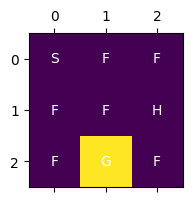

Omega: [array([[1.04641062, 1.12407966, 1.90722197, 2.87954153],
        [1.98093411, 2.01459376, 0.16364769, 2.73837091],
        [0.01734638, 0.47216457, 2.36763314, 2.71352072],
        [0.25694375, 2.17180763, 1.48722223, 0.8161247 ],
        [1.64744806, 0.69815402, 2.81695809, 0.66661982],
        [2.13072642, 1.59612869, 2.31785594, 0.88172218],
        [2.385512  , 2.52172991, 1.12256972, 1.79496446],
        [0.7107597 , 2.36616359, 0.79545244, 0.22311784],
        [2.61872887, 2.38711898, 0.25501791, 1.0701027 ]])
 array([[8.28373598e-02],
        [1.12728862e+02]])]
Zeta: [array([[3.41359786e-01, 1.11224782e-01],
        [2.99868762e-01, 8.96793769e-01],
        [9.23566776e-01, 1.00666739e-02],
        [7.94824809e-01, 6.93664347e-01],
        [9.88848939e-01, 2.54569923e-01],
        [9.69105182e-01, 4.96595443e-04],
        [7.13237161e-01, 6.71904404e-01],
        [7.91527989e-01, 8.75200950e-01],
        [9.15040968e-01, 5.98498362e-01]])
 array([[0.93872142, 0.99242653

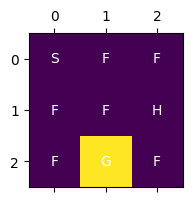

Omega: [array([[1.04641062, 1.12407966, 1.90722197, 2.87954153],
        [1.98093411, 2.01459376, 0.16364769, 2.73837091],
        [0.01734638, 0.47216457, 2.36763314, 2.71352072],
        [0.25694375, 2.17180763, 1.48722223, 0.8161247 ],
        [1.64744806, 0.69815402, 2.81695809, 0.66661982],
        [2.13072642, 1.59612869, 2.31785594, 0.88172218],
        [2.385512  , 2.52172991, 1.12256972, 1.79496446],
        [0.7107597 , 2.36616359, 0.79545244, 0.22311784],
        [2.61872887, 2.38711898, 0.25501791, 1.0701027 ]])
 array([[8.28373598e-02],
        [1.12728862e+02]])]
Zeta: [array([[3.41359786e-01, 1.11224782e-01],
        [2.99868762e-01, 8.96793769e-01],
        [9.23566776e-01, 1.00666739e-02],
        [7.94824809e-01, 6.93664347e-01],
        [9.88848939e-01, 2.54569923e-01],
        [9.69105182e-01, 4.96595443e-04],
        [7.13237161e-01, 6.71904404e-01],
        [7.91527989e-01, 8.75200950e-01],
        [9.15040968e-01, 5.98498362e-01]])
 array([[0.93872142, 0.99242653

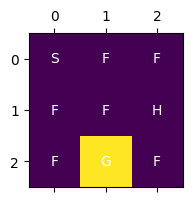

Omega: [array([[1.04641062, 1.12407966, 1.90722197, 2.87954153],
        [1.98093411, 2.01459376, 0.16364769, 2.73837091],
        [0.01734638, 0.47216457, 2.36763314, 2.71352072],
        [0.25694375, 2.17180763, 1.48722223, 0.8161247 ],
        [1.64744806, 0.69815402, 2.81695809, 0.66661982],
        [2.13072642, 1.59612869, 2.31785594, 0.88172218],
        [2.385512  , 2.52172991, 1.12256972, 1.79496446],
        [0.7107597 , 2.36616359, 0.79545244, 0.22311784],
        [2.61872887, 2.38711898, 0.25501791, 1.0701027 ]])
 array([[8.28373598e-02],
        [1.12728862e+02]])]
Zeta: [array([[3.41359786e-01, 1.11224782e-01],
        [2.99868762e-01, 8.96793769e-01],
        [9.23566776e-01, 1.00666739e-02],
        [7.94824809e-01, 6.93664347e-01],
        [9.88848939e-01, 2.54569923e-01],
        [9.69105182e-01, 4.96595443e-04],
        [7.13237161e-01, 6.71904404e-01],
        [7.91527989e-01, 8.75200950e-01],
        [9.15040968e-01, 5.98498362e-01]])
 array([[0.93872142, 0.99242653

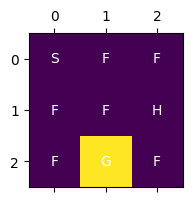

Omega: [array([[1.04641062, 1.12407966, 1.90722197, 2.87954153],
        [1.98093411, 2.01459376, 0.16364769, 2.73837091],
        [0.01734638, 0.47216457, 2.36763314, 2.71352072],
        [0.25694375, 2.17180763, 1.48722223, 0.8161247 ],
        [1.64744806, 0.69815402, 2.81695809, 0.66661982],
        [2.13072642, 1.59612869, 2.31785594, 0.88172218],
        [2.385512  , 2.52172991, 1.12256972, 1.79496446],
        [0.7107597 , 2.36616359, 0.79545244, 0.22311784],
        [2.61872887, 2.38711898, 0.25501791, 1.0701027 ]])
 array([[8.28373598e-02],
        [1.12728862e+02]])]
Zeta: [array([[3.41359786e-01, 1.11224782e-01],
        [2.99868762e-01, 8.96793769e-01],
        [9.23566776e-01, 1.00666739e-02],
        [7.94824809e-01, 6.93664347e-01],
        [9.88848939e-01, 2.54569923e-01],
        [9.69105182e-01, 4.96595443e-04],
        [7.13237161e-01, 6.71904404e-01],
        [7.91527989e-01, 8.75200950e-01],
        [9.15040968e-01, 5.98498362e-01]])
 array([[0.93872142, 0.99242653

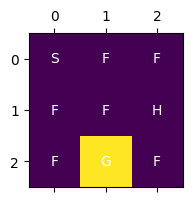

Omega: [array([[1.04641062, 1.12407966, 1.90722197, 2.87954153],
        [1.98093411, 2.01459376, 0.16364769, 2.73837091],
        [0.01734638, 0.47216457, 2.36763314, 2.71352072],
        [0.25694375, 2.17180763, 1.48722223, 0.8161247 ],
        [1.64744806, 0.69815402, 2.81695809, 0.66661982],
        [2.13072642, 1.59612869, 2.31785594, 0.88172218],
        [2.385512  , 2.52172991, 1.12256972, 1.79496446],
        [0.7107597 , 2.36616359, 0.79545244, 0.22311784],
        [2.61872887, 2.38711898, 0.25501791, 1.0701027 ]])
 array([[8.28373598e-02],
        [1.12728862e+02]])]
Zeta: [array([[3.41359786e-01, 1.11224782e-01],
        [2.99868762e-01, 8.96793769e-01],
        [9.23566776e-01, 1.00666739e-02],
        [7.94824809e-01, 6.93664347e-01],
        [9.88848939e-01, 2.54569923e-01],
        [9.69105182e-01, 4.96595443e-04],
        [7.13237161e-01, 6.71904404e-01],
        [7.91527989e-01, 8.75200950e-01],
        [9.15040968e-01, 5.98498362e-01]])
 array([[0.93872142, 0.99242653

In [ ]:
#make sure whatever comes out of env is [list of indices] over observations and pass this to agent.infer_states
from pymdp.envs.grid_worlds import GridWorldEnv

env = GridWorldEnv(shape = [3,3], init_state=0)

T = 10


#agent = agent_omega_fs
agent = agent_zeta_omega


initial_location_observation = 0
initial_score_observation = score_from_location(initial_location_observation)
observation = [0, 2]



for t in range(T):
    print(f"TIMESTEP: {t}")

    qs = agent.infer_states(observation)

    q_pi, G = agent.infer_policies()
    next_action = agent.sample_action()
    next_action = int(next_action[0])
    print(f"next_action: {location_action_names[next_action]}")
    location_observation = env.step(next_action)
    print(f"location_observation: {location_observation}")
    score_observation = score_from_location(location_observation)
    print(f"score_observation: {score_observation}")
    observation = [location_observation, score_observation]

    
    plot_grid(grid_width, grid_height, location_observation)

    if t > 0:

        agent.beta_omega, agent.beta_omega_prior = agent.update_omega()
        print(f"Omega: {agent.beta_omega}")

        agent.beta_zeta, agent.beta_zeta_prior = agent.update_zeta(observation)
        print(f"Zeta: {agent.beta_zeta}")
        agent.gamma = agent.update_gamma()

        print(f"Gamma: {agent.gamma}")


In [ ]:
agent.G

array([-14.54167755, -13.78274122, -12.9160894 , -13.01164456,
       -19.86410277, -19.87161027, -19.86410317, -22.30062236,
       -14.54474054, -13.78384043, -12.91396635, -13.01130377,
       -22.30062236, -15.8641029 , -15.86444378, -18.30062236,
       -13.9402432 , -12.89944618, -11.78491695, -11.91819675,
       -12.1343841 , -11.63487643, -11.04288785, -11.09132171,
       -11.12206495, -11.01116396,  -9.75338765,  -9.82022391,
       -12.24374166, -11.05744712,  -9.82430681, -10.84920907,
       -11.86409733, -18.30062236, -11.86410071, -14.30062236,
       -10.54472838,  -9.7838378 ,  -8.91398112,  -9.01125266,
       -10.30062236,  -7.8641032 ,  -6.30062237, -10.30062237,
       -11.86410322, -11.86408206, -14.27386339, -11.86409679,
       -14.544781  , -13.78383853, -12.91397433, -13.01131854,
       -14.54472011, -13.78382028, -12.91393343, -13.01128759,
       -15.83979659, -15.83794843, -18.22412062, -15.83549005,
       -14.54376249, -13.78348759, -12.91464046, -13.01

In [ ]:
agent.beta_omega

array([array([[1.04641062, 1.12407966, 1.90722197, 2.87954153],
              [1.98093411, 2.01459376, 0.16364769, 2.73837091],
              [0.01734638, 0.47216457, 2.36763314, 2.71352072],
              [0.25694375, 2.17180763, 1.48722223, 0.8161247 ],
              [1.64744806, 0.69815402, 2.81695809, 0.66661982],
              [2.13072642, 1.59612869, 2.31785594, 0.88172218],
              [2.385512  , 2.52172991, 1.12256972, 1.79496446],
              [0.7107597 , 2.36616359, 0.79545244, 0.22311784],
              [2.61872887, 2.38711898, 0.25501791, 1.0701027 ]]),
       array([[8.28373598e-02],
              [1.12728862e+02]])], dtype=object)

In [ ]:
agent.beta_omega_prior

array([array([[0.34880354, 0.37469322, 0.63574066, 0.95984718],
              [0.66031137, 0.67153125, 0.05454923, 0.9127903 ],
              [0.00578213, 0.15738819, 0.78921105, 0.90450691],
              [0.08564792, 0.72393588, 0.49574074, 0.27204157],
              [0.54914935, 0.23271801, 0.93898603, 0.22220661],
              [0.71024214, 0.5320429 , 0.77261865, 0.29390739],
              [0.79517067, 0.84057664, 0.37418991, 0.59832149],
              [0.2369199 , 0.7887212 , 0.26515081, 0.07437261],
              [0.87290962, 0.79570633, 0.08500597, 0.3567009 ]]),
       array([[0.02761245],
              [0.734926  ]])], dtype=object)

In [ ]:
agent.beta_omega_prior[0]

array([[0.34880354, 0.37469322, 0.63574066, 0.95984718],
       [0.66031137, 0.67153125, 0.05454923, 0.9127903 ],
       [0.00578213, 0.15738819, 0.78921105, 0.90450691],
       [0.08564792, 0.72393588, 0.49574074, 0.27204157],
       [0.54914935, 0.23271801, 0.93898603, 0.22220661],
       [0.71024214, 0.5320429 , 0.77261865, 0.29390739],
       [0.79517067, 0.84057664, 0.37418991, 0.59832149],
       [0.2369199 , 0.7887212 , 0.26515081, 0.07437261],
       [0.87290962, 0.79570633, 0.08500597, 0.3567009 ]])

In [ ]:
agent.q_pi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])